# **LGM-VIP Data Science Internship Programme**
# **Beginner Level Task-1**
# **Iris Flower Classification ML Project** 

In [1]:
import io # io Library used for various input and ouput operations
import numpy as np # numpy library used doing various operations on arrays
import pandas as pd # pandas library used for doing statstical calculations
import seaborn as sb # seaborn library is also used to interpreting the data in variousgraphs
from google.colab import files # this library used for dealing with files
import matplotlib.pyplot as plt # Matplotlib library is used for interpreting data in various graphs

We need to upload the data file into google colab so that we can access the data. For this we use files.upload() command.


In [2]:
uploaded = files.upload() # upload function is used to upload the any kind of files from anywhere

Saving iris.data to iris (1).data


**Reading the csv file:**
We firstly need to read the csv file into our variable called data. For this purpose, we use pre-defined function : read_csv in pandas library.


In [3]:
data = pd.read_csv(io.BytesIO(uploaded['iris.data'])) #Reading the csv file in data
data.head() #Head is used to show top 5 rows of the data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Now we have to change the header names of columns. We can do this by using ***columns operation***


In [4]:
data.columns=['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width','Type-Of-Species'] # Renaming the Column Names using Column operations in pandas
data.head()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Type-Of-Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


For Description (Like minimum, maximum, range, standard deviation,.....) of the Data Set which we are using it can be done by using **describe** function from **pandas library.**

In [5]:
data.describe()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For checking the Data Structure and NULL Values used in the data set we can **info function** from pandas  


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sepal-Length     149 non-null    float64
 1   Sepal-Width      149 non-null    float64
 2   Petal-Length     149 non-null    float64
 3   Petal-Width      149 non-null    float64
 4   Type-Of-Species  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Viewing Graphical Relationship of features using seaborn


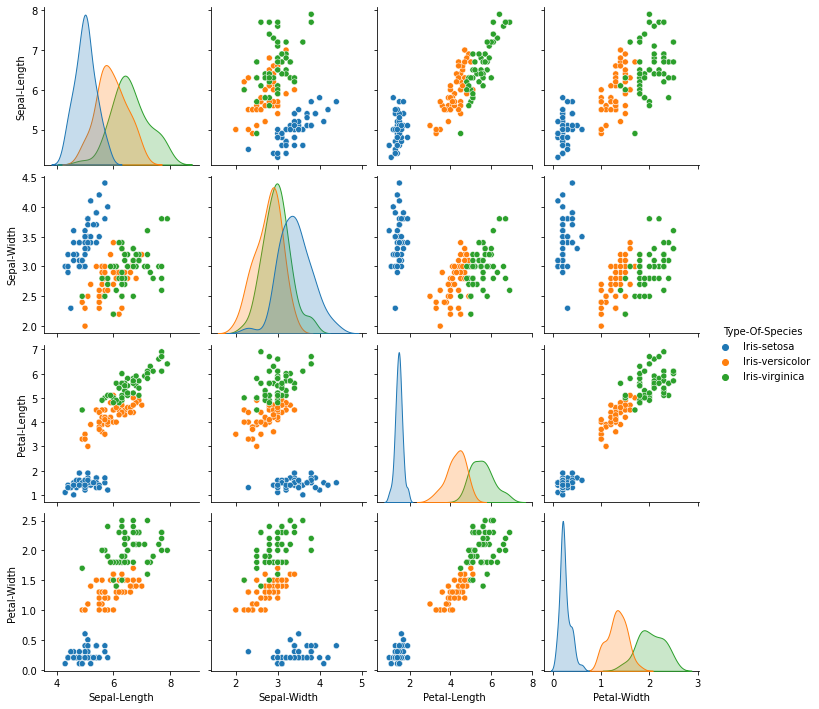

In [7]:
sb.pairplot(data,hue='Type-Of-Species',vars=['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width'])

From the Above Graphical Representation we can say that:

From Sepal Length & Sepal Width:
1.   Iris-Setosa has short length and long width
2.   Iris-versicolor has average length and average width
3.   Iris-virginica has long length and short width

From Petal Length & Petal Width:
1.   Iris-Setosa has short length and short width
2.   Iris-versicolor has average length and average width
3.   Iris-virginica has long length and long width





**Grouping Features:**


In [8]:
X=data[['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width']] #Assigning features into one group
Y=data['Type-Of-Species'] #Assigning Prediction outcome to one group

Splitting the data into train(80%) and test(20%):


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# **Logistic Regression Model Training**


In [10]:
from sklearn.linear_model import LogisticRegression # importing the logistic regression function from sklearn
lr = LogisticRegression(random_state=1) # Assigning the function LogisticRegression to a variable called lr
lr.fit(X_train,Y_train) # Fitting the the modle to training set 

LogisticRegression(random_state=1)

Prediction

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict=lr.predict(X_test)
conf=confusion_matrix(Y_test,y_predict)

In [12]:
print(classification_report(Y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [13]:
print(conf) #printing confussion matrix

[[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]


Evaluating Scores for for the Model in Training phase , Testing Phase and Overall Accuracy.


In [14]:
from sklearn.metrics import accuracy_score
train_score_lr = str(lr.score(X_train, Y_train)*100)
test_score_lr = str(lr.score(X_test, Y_test)*100)
accu_score_lr=str(accuracy_score(Y_test,y_predict)*100)
print(f'Train Score : {train_score_lr[:5]}%\nTest Score : {test_score_lr[:5]}%\nAccuracy Score : {accu_score_lr[:5]}%')

Train Score : 97.47%
Test Score : 96.66%
Accuracy Score : 96.66%
